# Investigating a dataset - Udacity's Nano Degree Program

As part of the project, I have selected the curated movie database. I will try to clean, analyze, interpret and answer few questions for which the answer can be found within this particular dataset.

## Four step analysis
- Introduction - getting the initial information about the dataset (number of NAs/0s, a snapshot of the initial statistics about the dataset etc.)
- Data Cleaning - removing duplicate rows, removing movies with budget and/or revenue of 0 as we cannot infer any analysis on those
- Data Analysis - trying to answer the questions posed below.
- Conclusions

Questions:
- Which was the most profitable movie? What about the least
- What year was the most profitable? 
- Which was the most profitable movie per genre? What about per year?
- What is the best month to release a movie? 
- What are the main correlations between profits and other variables? Popularity, Director, Runtime, Genre, Production Company, Voting Rating? - including visuals
    - Is there a recipe for success? Based on the correlation findings, can we derive an approach to get a profitable movie?


### Introduction

I will firstly import what I think the main libraries needed for this project. I will add more on the way as I see fit and the changes will be reflected as I go along.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [138]:
df = pd.read_csv('tmdb-movies.csv') # Reading the data from a csv file using the pandas functionality

In [139]:
df.shape # 10866 rows by 21 columns

(10866, 21)

In [140]:
df.head(1) # In order to see the first snapshot of the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [141]:
df.info() # Concise summary of type of values in the columns and how many

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [142]:
df.describe() # Initial snapshot of statistics about the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There seems to be 0 values for budget, revenue, runtime, budj adj and rev adj.

### Data Cleaning 
- Remove any duplicated rows
- Remove irrelevant columns
- Adjust the 0 values for budget and revenue with values we can use
- Changing release date to datetime format

In [143]:
len(df) - len(df.drop_duplicates()) # Drop duplicates will return the value after dropping any duplicated rows. This way we can the number of dupes

1

In [144]:
df.drop_duplicates(inplace=True)
print ('After removing the duplicated rows, we should expect ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

After removing the duplicated rows, we should expect 10865 rows and 21 columns


In [145]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj', 'revenue_adj'], axis = 1, inplace=True) # Dropping few columns that I find irrelevant to the analysis 

In [146]:
df.shape # As expected

(10865, 14)

In [147]:
df.query('budget == 0').count()['id'] # Incomplete information about the movie if budget is 0

5696

In [148]:
df['budget'] = df['budget'].replace(0,df['budget'].mean()) # Replacing the 0 values for budget with the mean values for the whole series

In [149]:
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean()) # Replacing the 0 values for revenue with the mean values for the whole series

In [150]:
df['runtime'] = df['runtime'].replace(0,df['runtime'].mean()) # Replacing the 0 values for runtime with the mean values for the whole series

In [151]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [152]:
df['release_date'] = pd.to_datetime(df['release_date']) # Changing the release date to a datetime format
df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 1.2+ MB


# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F2529A860>,
      dtype=object)

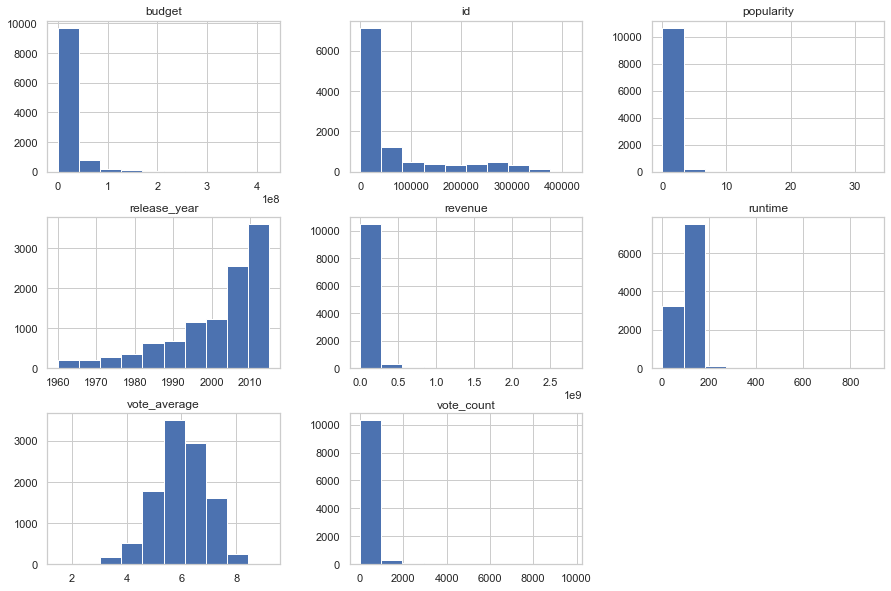

In [154]:
df.hist(figsize = (15,10))

In [155]:
df['profit'] = df['revenue'] - df['budget']

In [156]:
df.loc[df['profit'].idxmax(),:] # Using loc functionality to get the row where profit is max

id                                                                  19995
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

In [157]:
df.loc[df['profit'].idxmin(),:] # Using loc functionality to get the row where profit is min

id                                                                  46528
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

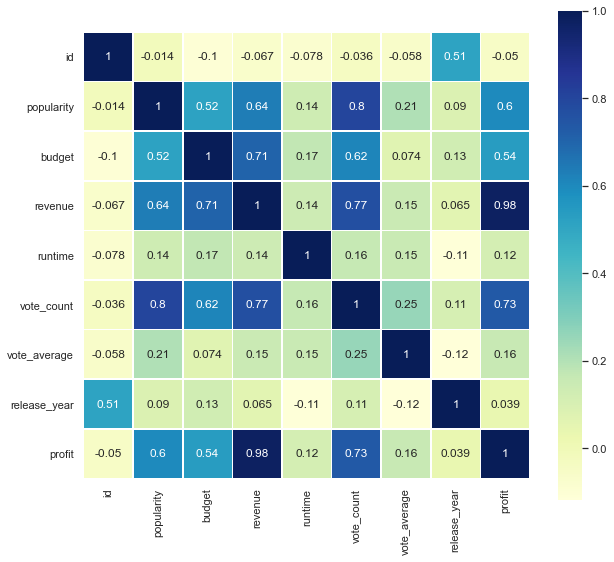

In [158]:
ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu", square = True, cbar_kws = {'shrink' : .9}, annot_kws= {'fontsize': 12})
plt.show()

Strong correlation between a movie's profit and it's vote count and it's popularity (the revenue and budget ones are obvious)

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


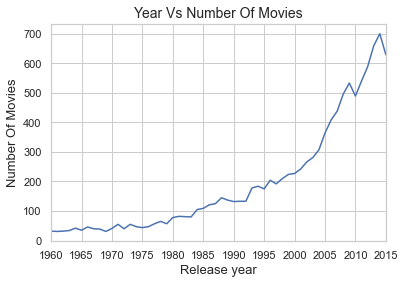

In [159]:
data=df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

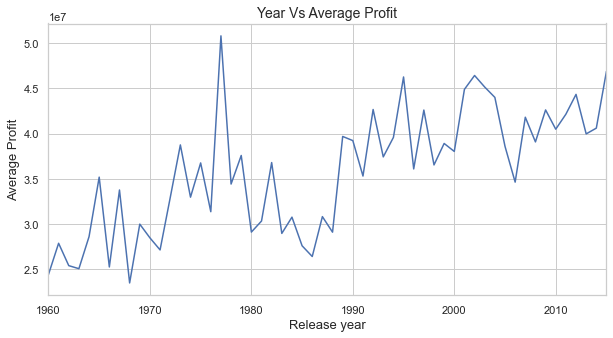

In [161]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year')['profit'].mean().plot()

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")